In [2]:
print('Hi') #() 
import pandas as pd
import numpy as np


Hi


In [67]:
base_path = 'part4/ResultsA/'

labels = ['c1t1','c1t2','c2t1','c2t2']
data_points = {'c1t1':[], 'c1t2':[], 'c2t1':[], 'c2t2':[]}

qps_average = {'c1t1':[], 'c1t2':[], 'c2t1':[], 'c2t2':[]}
lat_average = {'c1t1':[], 'c1t2':[], 'c2t1':[], 'c2t2':[]}
qps_error = {'c1t1':[], 'c1t2':[], 'c2t1':[], 'c2t2':[]}
lat_error = {'c1t1':[], 'c1t2':[], 'c2t1':[], 'c2t2':[]}


# read data
for ncores in range(1,3):
    for nthreads in range(1,3):
        lab = 'c' + str(ncores) + 't' + str(nthreads)
        data_dir = base_path + 'Core' + str(ncores) + 'Thread' + str(nthreads) + '/'
        data_r1 = pd.read_csv(data_dir + 'run1.ssv' , delim_whitespace=True)
        data_r2 = pd.read_csv(data_dir + 'run2.ssv' , delim_whitespace=True)
        data_r3 = pd.read_csv(data_dir + 'run3.ssv' , delim_whitespace=True) 

        #print(list(data_r1['p95']))
        for i in range(24):
            res = np.mean([
                list(data_r1['p95'])[i],
                list(data_r1['p95'])[i],
                list(data_r1['p95'])[i],
            ])
            qps = np.mean([
                list(data_r1['QPS'])[i], 
                list(data_r2['QPS'])[i],
                list(data_r3['QPS'])[i],
                ])

            res_err = np.std([
                list(data_r1['p95'])[i], 
                list(data_r2['p95'])[i],
                list(data_r3['p95'])[i],
                ])
            qps_err = np.std([
                list(data_r1['QPS'])[i], 
                list(data_r2['QPS'])[i],
                list(data_r3['QPS'])[i],
                ])
            
            
            qps_average[lab].append(qps)
            lat_average[lab].append(res)
            
            qps_error[lab].append(qps_err)
            lat_error[lab].append(res_err)

            #data_points['c' + str(ncores) + 't' + str(nthreads)].append(list(zip(qps,res)))
        # Average out the runs
        


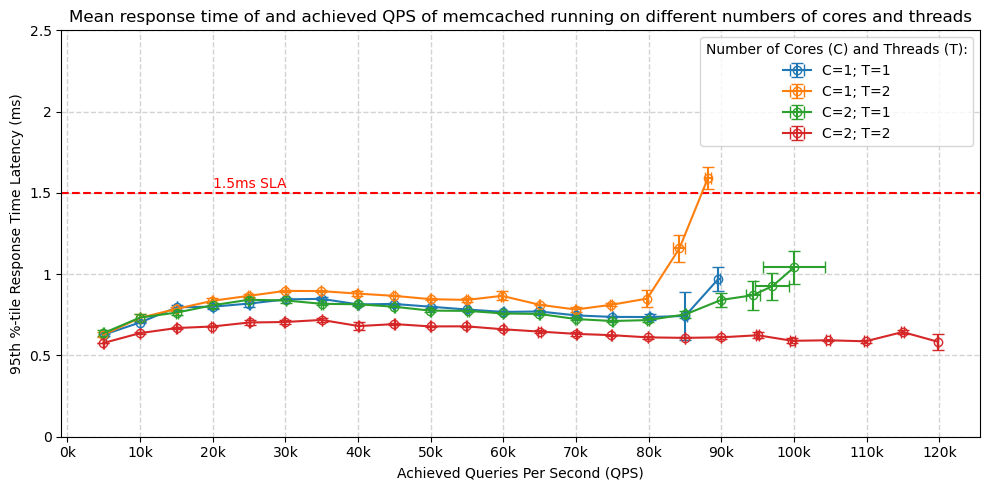

In [77]:
# Style figure
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5),dpi=100)

for lab in labels:
    # Remove duplicate ticks when performance flatlines near the end
    if lab == 'c1t1':
        positions = len(qps_average[lab]) - 6
    if lab == 'c1t2':
        positions = len(qps_average[lab]) - 6
    if lab == 'c2t1':
        positions = len(qps_average[lab]) - 3
    if lab == 'c2t2':
        positions = len(qps_average[lab]) - 0
        
    res_x = (qps_average[lab])[:positions]
    res_y = (lat_average[lab])[:positions]
    err_x = (qps_error[lab])[:positions]
    err_y = (lat_error[lab])[:positions]
        
    # plot the results
    plt.errorbar(res_x, res_y, yerr = err_y, xerr = err_x,
                 marker='o', markerfacecolor = 'none', capsize=4, label=lab)
                   #errorevery=(1,1))


# Fix up general points of style
plt.title("Mean response time of and achieved QPS of memcached running on different numbers of cores and threads" , fontsize=12)

xlabs = ['0k', '10k', '20k','30k','40k','50k','60k', '70k','80k','90k','100k', '110k','120k']
plt.xticks(range(0, 120001, 10000), xlabs)


ylabs = ['0','0.5','1', '1.5', '2', '2.5']
plt.yticks(range(0,2501,500), ylabs)



ylabel = '95th %-tile Response Time Latency (ms)'
xlabel = 'Achieved Queries Per Second (QPS)'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#labels[6] = "no interference"
#specify order of items in legend
#order = [0,2,4,5,1,3,6]
#add legend to plot
plt.legend(['C=1; T=1','C=1; T=2','C=2; T=1','C=2; T=2'], fontsize=10, title="Number of Cores (C) and Threads (T):") 
#legend = ['ibench-cpu', 'ibench-l1d', 'ibench-l1i', 'ibench-l2', 'ibench-llc', 'ibench-membw', 'no interference']
#plt.legend(legend, fontsize=10, title="Type of interference")
plt.grid(True, color='lightgray', linestyle='--', linewidth=1)
#fig_ax.set_title('Tail latency for different interferences at memcached', fontsize = 14)
# Save plot

# Add line to show SLA
plt.axhline(y=1500, color='r', linestyle='--')
plt.text(20000, 1530, '1.5ms SLA', color='r')

plt.tight_layout()
plt.savefig("plot4a.pdf")

23